## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [5]:
import pickle
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [12]:
# Load happiness pickle file
with open(DATA_FOLDER+"happiness2020.pkl", 'rb') as f:
    happiness = pickle.load(f)

happiness

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States
...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa


In [13]:
# Load country info csv file
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')

countries

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"
...,...,...,...,...
130,venezuela,912050,25730435,"93,4"
131,vietnam,329560,84402966,"90,3"
132,yemen,527970,21456188,"50,2"
133,zambia,752614,11502010,"80,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [28]:
# Add country_name column with lowercase names to merge on

happiness['country_name'] = happiness[['country']].copy().applymap(lambda x: x.lower())
country_features = happiness.merge(countries, on='country_name', how='outer')
country_features.drop('country_name', axis=1, inplace=True)

country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"
...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,"93,4"
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,"90,3"
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,"50,2"
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,"80,6"


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [34]:
# Sort values and get top 10, then display the names
country_features.sort_values(ascending=False, by=['happiness_score']).head(10)['country'].reset_index(drop=True)

0        Finland
1        Denmark
2    Switzerland
3        Iceland
4         Norway
5    Netherlands
6         Sweden
7    New Zealand
8        Austria
9     Luxembourg
Name: country, dtype: object

We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [41]:
# Aggregate the grouped world regions by mean and count respectively, then Sort
country_features[['world_region', 'happiness_score', 'country']].groupby('world_region').agg({'happiness_score': 'mean', 'country': 'count'}).sort_values(ascending=False, by=['happiness_score'])

,happiness_score,country
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [48]:
# Filter countries by region, then display
region = 'North America and ANZ'
country_features.query('world_region == @region')[['country', 'happiness_score']]

,country,happiness_score
5,Australia,7.2228
21,Canada,7.2321
88,New Zealand,7.2996
127,United States,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [54]:
# define print function and apply it to filtered countries
def print_country(row):
    print(row[0], ' - ', row[1], ' (', row[2], ')')
    return row

level='100,0'
temp_df = country_features.query('literacy == @level')[['world_region', 'country', 'happiness_score']].apply(lambda x: print_country(x), axis=1)

North America and ANZ  -  Australia  ( 7.222799778 )
Western Europe  -  Denmark  ( 7.645599842 )
Western Europe  -  Finland  ( 7.808700085 )
Western Europe  -  Luxembourg  ( 7.2375001910000005 )
Western Europe  -  Norway  ( 7.487999916000001 )


What is the global average?

In [64]:
# Convert literacy to float and calculate its mean
country_features.literacy.apply(lambda x: str(x).replace(',', '.')).astype(float).mean()

81.85112781954886

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [77]:
level='50,0'
print('The proportion of countries with a literacy level below {:.0%} is {:.2%}.'.format(0.5, country_features.query('literacy < @level').shape[0]/country_features.shape[0]))

The proportion of countries with a literacy level below 50% is 15.56%.


Print the raw number and the percentage of world population that is illiterate.

In [87]:
n_illiterate = ((100 - country_features.literacy.apply(lambda x: str(x).replace(',', '.')).astype(float))/100 * country_features.population).sum()
n_total = country_features.population.sum()
print('The number of people that are illiterate is {:.0f}.'.format(n_illiterate))
print('The proportion of people that are illiterate is {:.2%}.'.format(n_illiterate/n_total))

The number of people that are illiterate is 1249372988.
The proportion of people that are illiterate is 20.33%.


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [88]:
# Calculate population density
country_features['population_density'] = country_features[['population', 'area']].apply(lambda x: x[0]/x[1], axis=1)
country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0",47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5",124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0",13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1",14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6",99.878255
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,"93,4",28.211650
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,"90,3",256.108041
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,"50,2",40.639029
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,"80,6",15.282748


What is the happiness score of the 3 countries with the lowest population density?

In [89]:
# Write your code here
country_features.sort_values(ascending=True, by=['population_density']).head(3)[['country', 'happiness_score']]

,country,happiness_score
83,Mongolia,5.4562
5,Australia,7.2228
14,Botswana,3.4789


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<AxesSubplot:title={'center':'Healthy and Happy'}, xlabel='happiness_score', ylabel='healthy_life_expectancy'>

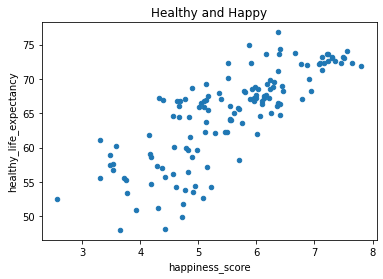

In [90]:
# Scatter plot
country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy', title='Healthy and Happy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.